In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from num2words import num2words
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
from docx import Document

In [3]:
T = Document('book.docx')  ## Document() function reads docx file and stores it in the variable T

In [4]:
fullText = []
for paragraph in T.paragraphs:
    fullText.append(paragraph.text)

In [5]:
fullText[:10]

['',
 'WHOM THE GODS DESTROYED',
 '',
 '',
 'I',
 '',
 'The most high gods have decided that too much power over the hearts of',
 'men shall not be given to other men, for then the givers are forgotten',
 'in the gift and the smoke dies away from the altars. So they kill the',
 'men who play with souls. According to an ancient saying, before they']

In [6]:
exclude = set(string.punctuation)                                    #Set containing charachters to exclude

def remove_apostrophe(data):                                         # Function to remove apostrophe and other similar charachters
    data = np.char.replace(data,"’","")
    data = np.char.replace(data, "'", "")
    data = np.char.replace(data, "‘", "")
        
    return data                                                      # Returns updated text

def remove_punctuation(data):                                        # Function to remove punctuation,hyphen,etc..
    for i in (exclude):
        data = np.char.replace(data, i, ' ')
        #data = np.char.replace(data, " ", "")
    data = np.char.replace(data, ',', ' ')
    data = np.char.replace(data, "“", "")
    data = np.char.replace(data, '"', "")
    data = np.char.replace(data, "-", " ")
    
    return data

def convert_numbers(data):                                          #Converts numbers to words using num2words
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
   
    return new_text


In [7]:
new_list = []                                    # List data structure to store preprocessed data 
for data in fullText:                            #Loops over fullText to apply data preprocessing function
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    new_list.append(data)                       # Preprocessed data is appended to new_list

In [8]:
new_list[:10]                                   # First 10 elements

['',
 ' WHOM THE GODS DESTROYED',
 '',
 '',
 ' I',
 '',
 ' The most high gods have decided that too much power over the hearts of',
 ' men shall not be given to other men for then the givers are forgotten',
 ' in the gift and the smoke dies away from the altars So they kill the',
 ' men who play with souls According to an ancient saying before they']

In [9]:
#Chapter heading were in BLOCK Letters, Remaining data stored in new_list_2
new_list_2 = []                             
for data in new_list:
    if not (data.isupper()):
        new_list_2.append(data)

In [10]:
documents = []
for item in new_list_2:
    if(len(item)!=0):
        documents.append(item)

In [11]:
#Imported SnowballStemmer to use in future algorithms

from nltk.stem.snowball import SnowballStemmer  
stemmer = SnowballStemmer("english")               

In [12]:
#Tokenizes and stems text 
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems 

In [13]:
#Tokenizes data
def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
## Implemented Functions defined above and stored text in List data Structure
Text_stemmed = []
Text_tokenized = []
for i in documents:
       
    allwords_stemmed = tokenize_and_stem(i)            #for each item in 'fullText', tokenize/stem
    Text_stemmed.extend(allwords_stemmed)              #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)              #only tokenizes
    Text_tokenized.extend(allwords_tokenized)          # extends Text_tokenize by adding newly tokenized list of words

In [15]:
Text_tokenized[:11]                                   # Tokenized words

['the',
 'most',
 'high',
 'gods',
 'have',
 'decided',
 'that',
 'too',
 'much',
 'power',
 'over']

In [16]:
Words = pd.DataFrame(Text_tokenized,columns=['Words'])          #Created a dataframe out of Stemmed Words

In [17]:
Words['Words'].value_counts()                                 #Count of words

the             4488
and             2811
he              2033
to              1915
a               1705
                ... 
gregory            1
txt                1
discontinue        1
twenty-seven       1
provisions         1
Name: Words, Length: 5260, dtype: int64

In [18]:
#Count of words added to the dataframe with a new column

Counts = pd.DataFrame(Words['Words'].value_counts())
Counts = Counts.reset_index()
Counts = Counts.rename(columns={"index": "Words", "Words": "Counts"})
Counts.head(10)

,Words,Counts
0,the,4488
1,and,2811
2,he,2033
3,to,1915
4,a,1705
5,of,1462
6,i,1259
7,in,1222
8,she,1160
9,it,1135


In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\drago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
stop = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves','click','nineteen','said'
       ]

stop_words = stopwords.words('english')
stop_words.extend(stop)
stop = set(stop_words)

In [21]:
# Function to remove all the stop words present in the data
def clean(data):
    stop_free = " ".join([i for i in data.lower().split() if i not in stop])
    return stop_free

In [22]:
# Data Preprocessing on the newly created data having no stop word
new_list_removed_stopwords = []
for data in fullText:
    data = remove_apostrophe(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = clean(data)
    
    new_list_removed_stopwords.append(data)

In [23]:
#Two List are created

Text_stemmed_removed_stopwords = [] #Contains Stemmed words having no stopwords
Text_tokenized_removed_stopword = [] #Contains Tokenized Words having no stopwords
for i in new_list_removed_stopwords:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'fullText', tokenize/stem
    Text_stemmed_removed_stopwords.extend(allwords_stemmed) #extend the 'Text_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Text_tokenized_removed_stopword.extend(allwords_tokenized)

In [24]:
Words_nostop = pd.DataFrame(Text_stemmed_removed_stopwords,columns=['Words'])  #Converted Stemmed List into a Dataframe

In [25]:
Words_nostop['Words'].value_counts() #Count of Words

man          288
know         243
littl        243
eye          240
look         228
            ... 
unenforc       1
increas        1
underscor      1
export         1
million        1
Name: Words, Length: 3564, dtype: int64

In [26]:
#Created New Columns "Counts" which stores Count of all the words
Counts_new = pd.DataFrame(Words_nostop['Words'].value_counts())
Counts_new = Counts_new.reset_index()
Counts_new = Counts_new.rename(columns={"index": "Words", "Words": "Counts"})
Counts_new.head(10)

,Words,Counts
0,man,288
1,know,243
2,littl,243
3,eye,240
4,look,228
5,old,206
6,come,201
7,like,200
8,dont,194
9,book,172


In [27]:
tagged = nltk.pos_tag(Counts_new['Words'])

In [28]:
tags = [obj[1] for obj in tagged]

In [29]:
Counts_new['Tags'] = tags

In [30]:
Counts_new.head(5)

,Words,Counts,Tags
0,man,288,NN
1,know,243,VBP
2,littl,243,VBZ
3,eye,240,NN
4,look,228,NN


In [31]:
from nltk.corpus import wordnet

In [32]:
word_list = []
word_type = []
word_type_2 = []
for word in Text_tokenized_removed_stopword:
    syns = wordnet.synsets(word)
    word_list.append(word)
    if(syns):
        word_type.append(syns[0].lexname().split('.')[0])
        word_type_2.append(syns[0].lexname())

    else:
        word_type.append('None')
        word_type_2.append('None')

    #print(word, syns[0].lexname().split('.')[0]) if syns else (word, None)

In [33]:
Text_tokenized_removed_stopword[1]

'destroyed'

In [34]:
wordnet.synsets('bank')[0].lexname()

'noun.object'

In [35]:
word_type

['noun',
 'verb',
 'noun',
 'noun',
 'verb',
 'noun',
 'noun',
 'noun',
 'None',
 'noun',
 'noun',
 'noun',
 'verb',
 'noun',
 'noun',
 'noun',
 'adj',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'verb',
 'noun',
 'noun',
 'verb',
 'noun',
 'noun',
 'adj',
 'noun',
 'noun',
 'adv',
 'noun',
 'noun',
 'verb',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'verb',
 'verb',
 'noun',
 'noun',
 'noun',
 'verb',
 'noun',
 'verb',
 'verb',
 'noun',
 'verb',
 'noun',
 'adj',
 'noun',
 'verb',
 'noun',
 'verb',
 'verb',
 'noun',
 'verb',
 'noun',
 'adv',
 'noun',
 'adv',
 'verb',
 'noun',
 'noun',
 'adv',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'noun',
 'adv',
 'adj',
 'verb',
 'noun',
 'verb',
 'noun',
 'noun',
 'adv',
 'adj',
 'noun',
 'adj',
 'noun',
 'verb',
 'noun',
 'None',
 'noun',
 'adj',
 'noun',
 'verb',
 'adv',
 'verb',
 'noun',
 'verb',
 'noun',
 'adv',
 'verb',
 'noun',
 'adj',
 'noun',
 'noun',
 'adj',
 'noun',
 'noun',
 'verb',


In [36]:
word_type_2

['noun.person',
 'verb.creation',
 'noun.attribute',
 'noun.person',
 'verb.cognition',
 'noun.attribute',
 'noun.act',
 'noun.group',
 'None',
 'noun.cognition',
 'noun.group',
 'noun.person',
 'verb.cognition',
 'noun.possession',
 'noun.phenomenon',
 'noun.artifact',
 'adj.all',
 'noun.artifact',
 'noun.act',
 'noun.group',
 'noun.communication',
 'noun.person',
 'verb.stative',
 'noun.person',
 'noun.communication',
 'verb.creation',
 'noun.person',
 'noun.cognition',
 'adj.all',
 'noun.act',
 'noun.act',
 'adv.all',
 'noun.cognition',
 'noun.person',
 'verb.motion',
 'noun.group',
 'noun.act',
 'noun.attribute',
 'noun.object',
 'noun.communication',
 'verb.motion',
 'verb.motion',
 'noun.time',
 'noun.person',
 'noun.person',
 'verb.communication',
 'noun.cognition',
 'verb.perception',
 'verb.contact',
 'noun.artifact',
 'verb.contact',
 'noun.body',
 'adj.all',
 'noun.substance',
 'verb.cognition',
 'noun.artifact',
 'verb.stative',
 'verb.motion',
 'noun.person',
 'verb.contac

In [37]:
WORD_TYPES = pd.DataFrame(word_list,columns=['Words'])
WORD_TYPES['Type'] =  word_type
WORD_TYPES['Type_Detail'] =  word_type_2

tagged = nltk.pos_tag(WORD_TYPES['Words'])
WORD_TYPES['Pos_Tag'] = [obj[1] for obj in tagged]
#WORD_TYPES = WORD_TYPES.rename(columns={"index": "Words", "Words": "Counts"})
#Counts_new.head(10)

In [38]:
Noun_Verb = WORD_TYPES[(WORD_TYPES['Type']== "verb") | (WORD_TYPES['Type']== "noun") ]

In [39]:
Noun_Verb.reset_index(drop=True,inplace=True)

In [40]:
Noun_Verb.head(10)

,Words,Type,Type_Detail,Pos_Tag
0,gods,noun,noun.person,NNS
1,destroyed,verb,verb.creation,VBN
2,high,noun,noun.attribute,JJ
3,gods,noun,noun.person,NNS
4,decided,verb,verb.cognition,VBD
5,power,noun,noun.attribute,NN
6,hearts,noun,noun.act,NNS
7,men,noun,noun.group,NNS
8,given,noun,noun.cognition,VBN
9,men,noun,noun.group,NNS


In [41]:
Noun_Verb[Noun_Verb['Type']=='noun']['Type_Detail'].unique()

array(['noun.person', 'noun.attribute', 'noun.act', 'noun.group',
       'noun.cognition', 'noun.possession', 'noun.phenomenon',
       'noun.artifact', 'noun.communication', 'noun.object', 'noun.time',
       'noun.body', 'noun.substance', 'noun.state', 'noun.event',
       'noun.feeling', 'noun.relation', 'noun.quantity', 'noun.location',
       'noun.animal', 'noun.food', 'noun.plant', 'noun.shape',
       'noun.process', 'noun.Tops', 'noun.motive'], dtype=object)

In [42]:
Noun_Verb[Noun_Verb['Type']=='verb']['Type_Detail'].unique()

array(['verb.creation', 'verb.cognition', 'verb.stative', 'verb.motion',
       'verb.communication', 'verb.perception', 'verb.contact',
       'verb.social', 'verb.emotion', 'verb.change', 'verb.competition',
       'verb.body', 'verb.possession', 'verb.consumption', 'verb.weather'],
      dtype=object)

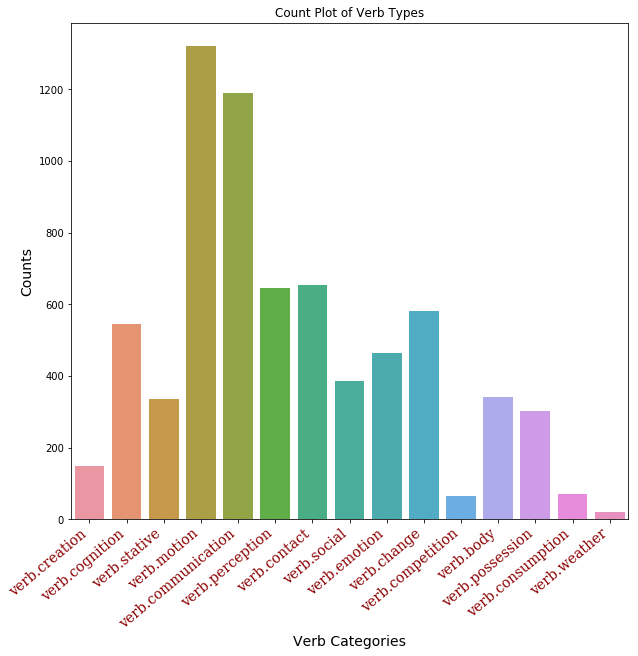

In [43]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


plt.figure(figsize=(9,9))
ax = sns.countplot(x="Type_Detail", data=Noun_Verb[Noun_Verb['Type']=='verb'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict=font)
plt.tight_layout()
plt.xlabel('Verb Categories',fontdict={'size':14})
plt.ylabel('Counts',fontdict={'size':14})
plt.title('Count Plot of Verb Types')

plt.show()


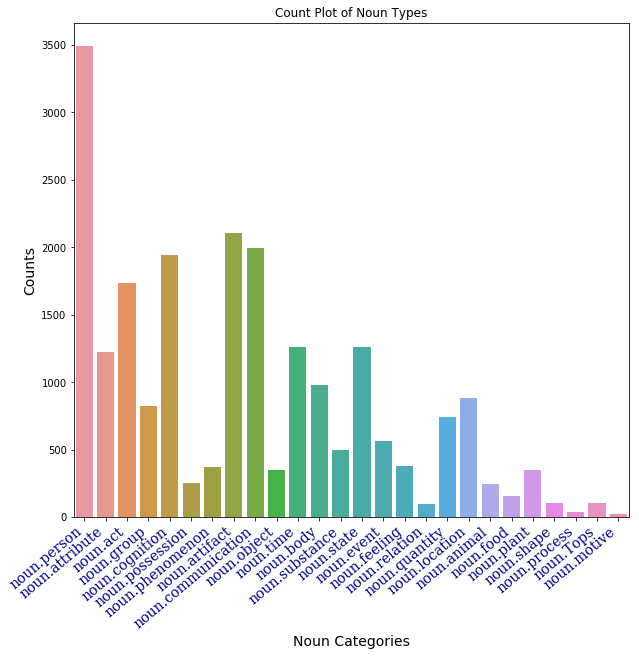

In [44]:
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 14,
        }


plt.figure(figsize=(9,9))
ax = sns.countplot(x="Type_Detail", data=Noun_Verb[Noun_Verb['Type']=='noun'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontdict=font)
plt.tight_layout()
plt.xlabel('Noun Categories',fontdict={'size':14})
plt.ylabel('Counts',fontdict={'size':14})
plt.title('Count Plot of Noun Types')
plt.show()


In [45]:
Noun_Verb['Type_Detail'].value_counts()

noun.person           3489
noun.artifact         2102
noun.communication    1997
noun.cognition        1939
noun.act              1732
verb.motion           1319
noun.state            1263
noun.time             1261
noun.attribute        1224
verb.communication    1190
noun.body              977
noun.location          885
noun.group             824
noun.quantity          739
verb.contact           654
verb.perception        644
verb.change            580
noun.event             567
verb.cognition         545
noun.substance         497
verb.emotion           465
verb.social            385
noun.feeling           381
noun.phenomenon        372
noun.plant             351
noun.object            347
verb.body              340
verb.stative           336
verb.possession        302
noun.possession        255
noun.animal            248
noun.food              155
verb.creation          149
noun.shape             103
noun.Tops              102
noun.relation           98
verb.consumption        71
v

In [46]:
def pre_process(data):
    data = tokenize_only(data)
    data = nltk.pos_tag(data)
    return data

In [47]:
new_list_2[:5]

['',
 '',
 '',
 '',
 ' The most high gods have decided that too much power over the hearts of']

In [48]:
pos_tagged_list = []
for item in documents:
    pos_tagged_list.append(pre_process(item))

In [49]:
pos_tagged_list[:2]

[[('the', 'DT'),
  ('most', 'RBS'),
  ('high', 'JJ'),
  ('gods', 'NNS'),
  ('have', 'VBP'),
  ('decided', 'VBN'),
  ('that', 'IN'),
  ('too', 'RB'),
  ('much', 'JJ'),
  ('power', 'NN'),
  ('over', 'IN'),
  ('the', 'DT'),
  ('hearts', 'NNS'),
  ('of', 'IN')],
 [('men', 'NNS'),
  ('shall', 'MD'),
  ('not', 'RB'),
  ('be', 'VB'),
  ('given', 'VBN'),
  ('to', 'TO'),
  ('other', 'JJ'),
  ('men', 'NNS'),
  ('for', 'IN'),
  ('then', 'RB'),
  ('the', 'DT'),
  ('givers', 'NNS'),
  ('are', 'VBP'),
  ('forgotten', 'VBN')]]

In [50]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [51]:
parser = nltk.RegexpParser(pattern)
parsed = []
for item in pos_tagged_list:
    par = parser.parse(item)
    parsed.append(par)

In [52]:
print(parser.parse(pos_tagged_list[1]))

(S
  men/NNS
  shall/MD
  not/RB
  be/VB
  given/VBN
  to/TO
  other/JJ
  men/NNS
  for/IN
  then/RB
  the/DT
  givers/NNS
  are/VBP
  forgotten/VBN)


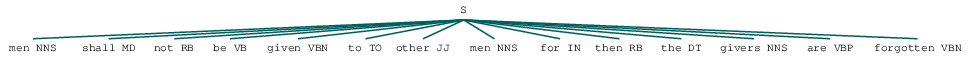

In [53]:
parser.parse(pos_tagged_list[1])

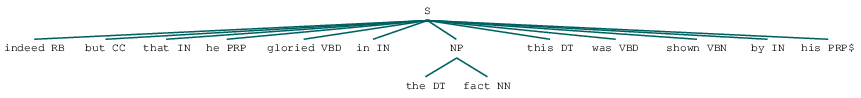

In [54]:
parser.parse(pos_tagged_list[8])

In [55]:
parsed

[Tree('S', [('the', 'DT'), ('most', 'RBS'), ('high', 'JJ'), ('gods', 'NNS'), ('have', 'VBP'), ('decided', 'VBN'), ('that', 'IN'), ('too', 'RB'), Tree('NP', [('much', 'JJ'), ('power', 'NN')]), ('over', 'IN'), ('the', 'DT'), ('hearts', 'NNS'), ('of', 'IN')]),
 Tree('S', [('men', 'NNS'), ('shall', 'MD'), ('not', 'RB'), ('be', 'VB'), ('given', 'VBN'), ('to', 'TO'), ('other', 'JJ'), ('men', 'NNS'), ('for', 'IN'), ('then', 'RB'), ('the', 'DT'), ('givers', 'NNS'), ('are', 'VBP'), ('forgotten', 'VBN')]),
 Tree('S', [('in', 'IN'), Tree('NP', [('the', 'DT'), ('gift', 'NN')]), ('and', 'CC'), Tree('NP', [('the', 'DT'), ('smoke', 'NN')]), ('dies', 'VBZ'), ('away', 'RB'), ('from', 'IN'), ('the', 'DT'), ('altars', 'NNS'), ('so', 'IN'), ('they', 'PRP'), ('kill', 'VBP'), ('the', 'DT')]),
 Tree('S', [('men', 'NNS'), ('who', 'WP'), ('play', 'VBP'), ('with', 'IN'), ('souls', 'NNS'), ('according', 'VBG'), ('to', 'TO'), ('an', 'DT'), ('ancient', 'JJ'), ('saying', 'VBG'), ('before', 'IN'), ('they', 'PRP')]),

In [56]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint


In [57]:
IOB_tagged_list = []
for item in parsed:
    iob_tagged = tree2conlltags(item)
    IOB_tagged_list.append(iob_tagged)

In [58]:
IOB_tagged_list[1]

[('men', 'NNS', 'O'),
 ('shall', 'MD', 'O'),
 ('not', 'RB', 'O'),
 ('be', 'VB', 'O'),
 ('given', 'VBN', 'O'),
 ('to', 'TO', 'O'),
 ('other', 'JJ', 'O'),
 ('men', 'NNS', 'O'),
 ('for', 'IN', 'O'),
 ('then', 'RB', 'O'),
 ('the', 'DT', 'O'),
 ('givers', 'NNS', 'O'),
 ('are', 'VBP', 'O'),
 ('forgotten', 'VBN', 'O')]

In [59]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [60]:
#import spacy
#from spacy import displacy
#rom collections import Counter
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [61]:
example = new_list_2[15]
### example = 'built myself on the shore of Walden Pond in Concord Massachusetts'
eg = nlp(example)
print(eg.ents)

(one,)


In [62]:
new_list_2[15]

' regarded the cottages before one of which he paused leaned forward'

In [63]:
for entity in eg.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

one - CARDINAL - Numerals that do not fall under another type


In [64]:
entities_list = []

for item in new_list_2:
    if(len(item)>0):
        entities = nlp(item)
        for entity in entities.ents:
            entity_text = entity.text
            entity_label = entity.label_
            entity_label_description = str(spacy.explain(entity.label_))
            entities_list.append((item,entity_text,entity_label,entity_label_description))
            
                                           

In [65]:
Entities_List = pd.DataFrame(entities_list,columns=['item','entity_text','entity_label','entity_label_description'])


In [66]:
pd.set_option('display.max_rows', 0)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1500)
pd.options.display.max_colwidth = 100


In [67]:
Entities_List

,item,entity_text,entity_label,entity_label_description
0,regarded the cottages before one of which he paused leaned forward,one,CARDINAL,Numerals that do not fall under another type
1,I have what my brother in law calls Bohemian tastes As nearly as I,Bohemian,PERSON,"People, including fictional"
2,scornful dance of a ragged man before the Averys cottage was odd in,Averys,PERSON,"People, including fictional"
3,nothing to hear but Miss Kitty Avery playing Chopins Fourth Ballade,Kitty Avery,PERSON,"People, including fictional"
4,in F minor She played it badly of course but nobody who knew Kitty,F,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
5,in F minor She played it badly of course but nobody who knew Kitty,Kitty,GPE,"Countries, cities, states"
6,Avery would have imagined that she would play otherwise than badly,Avery,ORG,"Companies, agencies, institutions, etc."
7,unfortunate Kittys method and selection were so I passed directly by,Kittys,PERSON,"People, including fictional"
8,its a woman from the pawin round she does Bah Thinks shes,Bah Thinks,PERSON,"People, including fictional"
9,Can I play it better Well Ill tell you one thing If I couldnt play,Ill,PERSON,"People, including fictional"
